In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter, MaxNLocator
from numpy import linspace
 
# Define the x and y data 
# For example just using random numbers
x = np.random.randn(10000)
y = np.random.randn(10000)
 
def hist2d_withprojections(x,y,xlabel = '$\mathrm{Your\\ X\\ Label}$',ylabel = '$\mathrm{Your\\ Y\\ Label}$'):
    # Define a function to make the ellipses
    def ellipse(ra,rb,ang,x0,y0,Nb=100):
        xpos,ypos=x0,y0
        radm,radn=ra,rb
        an=ang
        co,si=np.cos(an),np.sin(an)
        the=linspace(0,2*np.pi,Nb)
        X=radm*np.cos(the)*co-si*radn*np.sin(the)+xpos
        Y=radm*np.cos(the)*si+co*radn*np.sin(the)+ypos
        return X,Y


    # Set up default x and y limits
    xlims = [min(x),max(x)]
    ylims = [min(y),max(y)]


    # Define the locations for the axes
    left, width = 0.12, 0.55
    bottom, height = 0.12, 0.55
    bottom_h = left_h = left+width+0.02

    # Set up the geometry of the three plots
    rect_temperature = [left, bottom, width, height] # dimensions of temp plot
    rect_histx = [left, bottom_h, width, 0.25] # dimensions of x-histogram
    rect_histy = [left_h, bottom, 0.25, height] # dimensions of y-histogram

    # Set up the size of the figure
    fig = plt.figure(1, figsize=(9.5,9))

    # Make the three plots
    axTemperature = plt.axes(rect_temperature) # temperature plot
    axHistx = plt.axes(rect_histx) # x histogram
    axHisty = plt.axes(rect_histy) # y histogram

    # Remove the inner axes numbers of the histograms
    nullfmt = NullFormatter()
    axHistx.xaxis.set_major_formatter(nullfmt)
    axHisty.yaxis.set_major_formatter(nullfmt)

    # Find the min/max of the data
    xmin = min(xlims)
    xmax = max(xlims)
    ymin = min(ylims)
    ymax = max(y)

    # Make the 'main' temperature plot
    # Define the number of bins
    nxbins = 50
    nybins = 50
    nbins = 100

    xbins = linspace(start = xmin, stop = xmax, num = nxbins)
    ybins = linspace(start = ymin, stop = ymax, num = nybins)
    xcenter = (xbins[0:-1]+xbins[1:])/2.0
    ycenter = (ybins[0:-1]+ybins[1:])/2.0
    aspectratio = 1.0*(xmax - 0)/(1.0*ymax - 0)

    H, xedges,yedges = np.histogram2d(y,x,bins=(ybins,xbins))
    X = xcenter
    Y = ycenter
    Z = H

    # Plot the temperature data
    cax = (axTemperature.imshow(H, extent=[xmin,xmax,ymin,ymax],
           interpolation='nearest', origin='lower',aspect=aspectratio))

    # Plot the temperature plot contours
    contourcolor = 'white'
    xcenter = np.mean(x)
    ycenter = np.mean(y)
    ra = np.std(x)
    rb = np.std(y)
    ang = 0

    # X,Y=ellipse(ra,rb,ang,xcenter,ycenter)
    # axTemperature.plot(X,Y,"k:",ms=1,linewidth=2.0)
    # axTemperature.annotate('$1\\sigma$', xy=(X[15], Y[15]), xycoords='data',xytext=(10, 10),
    #                        textcoords='offset points', horizontalalignment='right',
    #                        verticalalignment='bottom',fontsize=25)

    # X,Y=ellipse(2*ra,2*rb,ang,xcenter,ycenter)
    # axTemperature.plot(X,Y,"k:",color = contourcolor,ms=1,linewidth=2.0)
    # axTemperature.annotate('$2\\sigma$', xy=(X[15], Y[15]), xycoords='data',xytext=(10, 10),
    #                        textcoords='offset points',horizontalalignment='right',
    #                        verticalalignment='bottom',fontsize=25, color = contourcolor)

    # X,Y=ellipse(3*ra,3*rb,ang,xcenter,ycenter)
    # axTemperature.plot(X,Y,"k:",color = contourcolor, ms=1,linewidth=2.0)
    # axTemperature.annotate('$3\\sigma$', xy=(X[15], Y[15]), xycoords='data',xytext=(10, 10),
    #                        textcoords='offset points',horizontalalignment='right',
    #                        verticalalignment='bottom',fontsize=25, color = contourcolor)

    #Plot the axes labels
    axTemperature.set_xlabel(xlabel,fontsize=25)
    axTemperature.set_ylabel(ylabel,fontsize=25)

    #Make the tickmarks pretty
    ticklabels = axTemperature.get_xticklabels()
    for label in ticklabels:
        label.set_fontsize(18)
        label.set_family('serif')

    ticklabels = axTemperature.get_yticklabels()
    for label in ticklabels:
        label.set_fontsize(18)
        label.set_family('serif')

    #Set up the plot limits
    axTemperature.set_xlim(xlims)
    axTemperature.set_ylim(ylims)

    #Set up the histogram bins
    xbins = np.arange(xmin, xmax, (xmax-xmin)/nbins)
    ybins = np.arange(ymin, ymax, (ymax-ymin)/nbins)

    #Plot the histograms
    axHistx.hist(x, bins=xbins, color = 'blue')
    axHisty.hist(y, bins=ybins, orientation='horizontal', color = 'red')

    #Set up the histogram limits
    axHistx.set_xlim( min(x), max(x) )
    axHisty.set_ylim( min(y), max(y) )

    #Make the tickmarks pretty
    ticklabels = axHistx.get_yticklabels()
    for label in ticklabels:
        label.set_fontsize(12)
        label.set_family('serif')

    #Make the tickmarks pretty
    ticklabels = axHisty.get_xticklabels()
    for label in ticklabels:
        label.set_fontsize(12)
        label.set_family('serif')

    #Cool trick that changes the number of tickmarks for the histogram axes
    axHisty.xaxis.set_major_locator(MaxNLocator(4))
    axHistx.yaxis.set_major_locator(MaxNLocator(4))

    #Show the plot
    plt.draw()

# hist2d_withprojections(x,y,"papas","fritas")

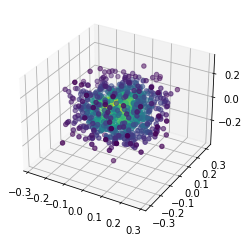

In [9]:
# import numpy as np
# from scipy import stats
# from mayavi import mlab

# mu, sigma = 0, 0.1 
# x = 10*np.random.normal(mu, sigma, 5000)
# y = 10*np.random.normal(mu, sigma, 5000)
# z = 10*np.random.normal(mu, sigma, 5000)

# xyz = np.vstack([x,y,z])
# kde = stats.gaussian_kde(xyz)
# density = kde(xyz)

# # Plot scatter with mayavi
# figure = mlab.figure('DensityPlot')
# pts = mlab.points3d(x, y, z, density, scale_mode='none', scale_factor=0.07)
# mlab.axes()
# mlab.show()

# import numpy as np
# from scipy import stats
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D 

# mu, sigma = 0, 0.1 
# x = np.random.normal(mu, sigma, 1000)
# y = np.random.normal(mu, sigma, 1000)
# z = np.random.normal(mu, sigma, 1000)

# xyz = np.vstack([x,y,z])
# density = stats.gaussian_kde(xyz)(xyz) 

# idx = density.argsort()
# x, y, z, density = x[idx], y[idx], z[idx], density[idx]

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x, y, z, c=density)
# plt.show()